# Aufgabe 24 - F-Praktikum

## Teilaufgabe a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from uncertainties import correlated_values
import uncertainties as unc
import uncertainties.unumpy as unp
from uncertainties import ufloat

In [2]:
def sinCos(x, a_1, a_2):
    return a_1*np.cos(x)+a_2*np.sin(x)

In [3]:
psi = np.linspace(0,330,12)
psi = np.deg2rad(psi)
asymmetrie = np.array([-0.032,0.010,0.057,0.068,0.076,0.080,0.031,0.005,-0.041,-0.090,-0.088,-0.074])
f1 = np.cos(psi)
f2 = np.sin(psi)
A = np.vstack((f1,f2)).T # 12x2-Matrix, da zwei f und 12 psi. 
print('Die Designmatrix ist:')
print(A)
sigma = 0.011
W = np.diag(1/sigma**2*np.ones(len(psi))) # Mach eine Diagonale Matrix mit 1/sigma^2 auf der Hauptdiagonalen

Die Designmatrix ist:
[[ 1.00000000e+00  0.00000000e+00]
 [ 8.66025404e-01  5.00000000e-01]
 [ 5.00000000e-01  8.66025404e-01]
 [ 6.12323400e-17  1.00000000e+00]
 [-5.00000000e-01  8.66025404e-01]
 [-8.66025404e-01  5.00000000e-01]
 [-1.00000000e+00  1.22464680e-16]
 [-8.66025404e-01 -5.00000000e-01]
 [-5.00000000e-01 -8.66025404e-01]
 [-1.83697020e-16 -1.00000000e+00]
 [ 5.00000000e-01 -8.66025404e-01]
 [ 8.66025404e-01 -5.00000000e-01]]


## Teilaufgabe b)

In [4]:
eigeneParams = np.dot(np.linalg.inv(A.T@W@A)@A.T@W, asymmetrie)
print('Die selbst berechneten Schätzungen für die Parameter a_i sind:')
print('a_1 =', eigeneParams[0], 'und a_2 =', eigeneParams[1])

Die selbst berechneten Schätzungen für die Parameter a_i sind:
a_1 = -0.03750629752731356 und a_2 = 0.07739977596525384


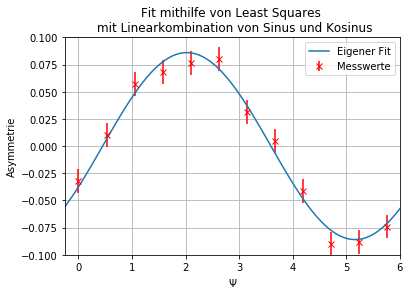

<Figure size 432x288 with 0 Axes>

In [5]:
psilin = np.linspace(-0.5,6.5,100)
plt.errorbar(psi, asymmetrie, color='r',yerr = sigma, label='Messwerte', ls='none', marker='x')
plt.plot(psilin, sinCos(psilin,*eigeneParams), label='Eigener Fit')
plt.legend()
plt.grid()
plt.axis((-0.25,6,-0.1,0.1))
plt.ylabel('Asymmetrie')
plt.xlabel(r'$\Psi$')
plt.title('Fit mithilfe von Least Squares \n mit Linearkombination von Sinus und Kosinus')
plt.show()
plt.clf()

## Teilaufgabe c)

In [6]:
V = np.linalg.inv(A.T@W@A)
sigma_a1 = np.sqrt(V[0,0]) # 1,1 Element von V ist Varianz von x_1
sigma_a2 = np.sqrt(V[1,1])
eigena_1 = ufloat(eigeneParams[0], sigma_a1)
eigena_2 = ufloat(eigeneParams[1], sigma_a2)
cov = V[0,1]
rho = cov/(sigma_a1*sigma_a2)
print('Die selbst berechneten Werte sind:')
print('Kovarianzmatrix:')
print(V)
print('sigma_{a_1} =', sigma_a1, ',sigma_{a_2} =', sigma_a2)
print('Korrelationskoeffizient:', rho)

#Kontrolle
scipyParams, covariance_matrix = optimize.curve_fit(sinCos, psi, asymmetrie, sigma=sigma*np.ones(len(psi)))
scipya_1, scippya_2 = correlated_values(scipyParams, covariance_matrix)
print('Zur Kontrolle sind die von Scipy berechneten Parameter:')
print('a_1 mit Fehler:', scipya_1, 'a_2 mit Fehler:', scippya_2)

Die selbst berechneten Werte sind:
Kovarianzmatrix:
[[ 2.01666667e-05 -1.10965933e-21]
 [-1.10965933e-21  2.01666667e-05]]
sigma_{a_1} = 0.004490731195102493 ,sigma_{a_2} = 0.004490731195102493
Korrelationskoeffizient: -5.502442945726215e-17
Zur Kontrolle sind die von Scipy berechneten Parameter:
a_1 mit Fehler: -0.038+/-0.004 a_2 mit Fehler: 0.077+/-0.004


## Teilaufgabe d)

In [7]:
A_0 = np.sqrt(eigeneParams[0]**2+eigeneParams[1]**2)
delta = np.arctan2(eigeneParams[1],eigeneParams[0]) # Eingebaute Fallunterscheidung für unterschiedliche Quadranten

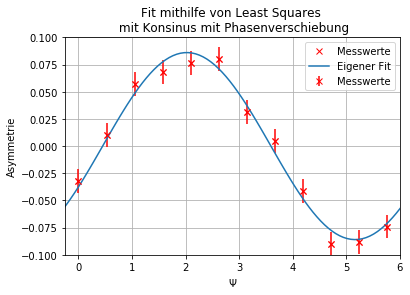

In [8]:
plt.errorbar(psi, asymmetrie, color='r',yerr = sigma, label='Messwerte', ls='none', marker='x')
plt.plot(psi, asymmetrie, 'rx', label='Messwerte')
plt.plot(psilin, A_0*np.cos(psilin-delta), label='Eigener Fit')
plt.legend()
plt.title('Fit mithilfe von Least Squares \n mit Konsinus mit Phasenverschiebung')
plt.grid()
plt.axis((-0.25,6,-0.1,0.1))
plt.ylabel('Asymmetrie')
plt.xlabel(r'$\Psi$')
plt.show()

Die Fehler von $A_0$ und $\delta$ lassen sich mit Hilfe einer Matrixmultiplikation berechnen. 
Die Kovarianzmatrix von $a_1$ und $a_2$ wird mit der Jacobi-Matrix $J$ transformiert.
\begin{equation}
    V[\vec{y}] = J V[\vec{x}] J^\text{T}
\end{equation}
$A_0$ und $\delta$ lassen sich folgendermaßen aus $a_1$ und $a_2$ berechnen.
\begin{equation}
    A_0 = \sqrt{a_1^2 + a_2^2}
\end{equation}
\begin{equation}
    \delta = \arctan\left(\frac{a_2}{a_1}\right)
\end{equation}


In [9]:
# Ableitungen in der Jacobi-Matrix
dAda1 = eigeneParams[0]/np.sqrt(eigeneParams[0]**2+eigeneParams[1]**2)
dAda2 = eigeneParams[1]/np.sqrt(eigeneParams[0]**2+eigeneParams[1]**2)
dDelda1 = -eigeneParams[1]/(eigeneParams[0]**2+eigeneParams[1]**2)
dDelda2 = eigeneParams[0]/(eigeneParams[0]**2+eigeneParams[1]**2)

# Jacobi-Matrix
J = np.array(((dAda1,dAda2),(dDelda1,dDelda2)))

# neue Kovarianzmatrix
V_new = np.matrix(J@V@J.T)

sigma_A0 = np.sqrt(V_new[0,0])
sigma_delta = np.sqrt(V_new[1,1])
eigenA0 = ufloat(A_0, sigma_A0)
eigendelta = ufloat(delta, sigma_delta)
cov_new = V_new[0,1]
rho_new = cov_new/(sigma_A0*sigma_delta)
print('Kovarianzmatrix:')
print(V_new)
print()
print('A_0 =', eigenA0, 'delta =', eigendelta)
print()
print('Korrelationskoeffizient:', rho_new)

Kovarianzmatrix:
[[2.01666667e-05 1.35525272e-20]
 [1.35525272e-20 2.72616550e-03]]

A_0 = 0.086+/-0.004 delta = 2.02+/-0.05

Korrelationskoeffizient: 5.77999040081017e-17
